<a href="https://colab.research.google.com/github/ibader85/PredictiveAnalytics/blob/main/09_Module_4_Naive_Bayes_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

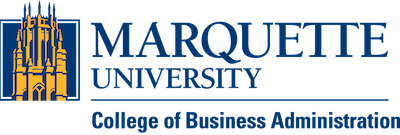

# BUAN 3065: Unlocking Business Insights with Predictive Analytics
# Module 4 Naive Bayes Exercise Using Python

Instructor: Dr. Badar Al Lawati

In [1]:
# In this example, we designate Poverty = 1 as the target class, and Poverty = 0 as the nontarget class

import pandas as pd
myData = pd.read_excel('/content/Census.xlsx', sheet_name = 'Census_Data')

In [2]:
# use the astype function to convert the data types of all the columns to categorical data
# Then inspect the dtypes property to verify that all the
# variables have been converted to data type “category”

myData = myData.astype('category')
myData.dtypes

,0
Married,category
Female,category
White,category
Age,category
Edu,category
Poverty,category


Within the training and test sets, data are further partitioned into
predictor variables (i.e., X_train and X_test) and target variables
(i.e., y_train and y_test). X_train and X_test include all the
columns in myData except the target variable, Poverty

to accomplish this, in the first option of the train_test_split function, we use the drop function with axis = 1, specifying that the Poverty column is removed from the dataset

The second option specifies the target variable, myData.Poverty, that will be stored in y_train and y_test

We use the option, test_size = 0.40, to specify the
percentage of data reserved for the test set

Finally, the random_state option is used to ensure reproducibility of the random partitioning

By setting the random_state to a fixed value
such as 321, we ensure that the data split remains the same every
time the code is executed

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(myData.drop('Poverty', axis = 1),
myData.Poverty, test_size = 0.40, random_state = 321)

In [4]:
# Use the len function to verify that the correct number of cases are in each data set
# To Verify that there are 5,988 cases in the training data sets and 3,992 cases in the test data sets

len(X_train)

5988

In [5]:
len(X_test)

3992

To perform naïve Bayes analysis, we need to encode the predictor
variables in X_train and X_test as integer arrays

To do this, we
use Scikit-Learn’s OrdinalEncoder class to fit the encoder to the
predictor variables in the data set

Then store the
fitted encoder in a variable named dataEncoder to be used later
on the training, test, and score data sets

In [6]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
dataEncoder = encoder.fit(myData.drop('Poverty', axis = 1))

In [7]:
# We apply the encoder to the predictor variables in both the
# training and test data sets using the transform function

X_train_encoded = dataEncoder.transform(X_train)
X_test_encoded = dataEncoder.transform(X_test)

In [8]:
# Import the CategoricalNB class and create a variable named nb_model

from sklearn.naive_bayes import CategoricalNB
nb_model = CategoricalNB()

To define a grid of hyperparameter values for the naïve Bayes
model, we create a dictionary variable, paramGrid

the hyperparameter being tuned is fit_ prior, When fit_ prior is set
to True, the model will estimate class priors based on the
frequency of each class in the training data

When it is set to
False, the model will assume that all classes have equal prior
probabilities

In [9]:
paramGrid = {'fit_prior': [True, False]}

Then import the Scikit-Learn’s GridSearchCV class and create
a variable named search with four options

The first two options
are used to specify our model from earlier and our hyperparameter
grid

The cv = 10 option specifies that we will use the
10-fold cross-validation method

The last option chooses accuracy
as the scoring metric for comparing naïve Bayes models with
different fit_ prior settings

In [10]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(nb_model, paramGrid, cv = 10, scoring = 'accuracy')

In [11]:
# use the fit function to develop a naïve Bayes model based on
# the training data set and the hyperparameter tuning and crossvalidation
# from the previous steps and save the result in nb_fit

nb_fit = search.fit(X_train_encoded, y_train)
pd.DataFrame(nb_fit.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_prior,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003909,0.001110,0.001509,0.000245,True,{'fit_prior': True},0.777963,0.771285,0.789649,0.819699,0.766277,0.774624,0.782972,0.787980,0.790970,0.779264,0.784068,0.014122,1
1,0.003522,0.000614,0.001491,0.000269,False,{'fit_prior': False},0.747913,0.714524,0.756260,0.751252,0.722871,0.724541,0.742905,0.746244,0.740803,0.725753,0.737307,0.013467,2


In [12]:
# sort the output based on accuracy ranking (stored in the
# rank_test_score column) using the sort_values function

pd.DataFrame(nb_fit.cv_results_).sort_values('rank_test_score')[['params', 'mean_test_score', 'rank_test_score']]

# The params column shows the two tuning options for fit_ prior
# The mean_test_score column displays the average accuracy rate across all cross-validation samples
# The rank_test_score column ranks the naïve Bayes models in terms of the average accuracy measure

,params,mean_test_score,rank_test_score
0,{'fit_prior': True},0.784068,1
1,{'fit_prior': False},0.737307,2


As you can see from the result, the
model with fit_ prior set to True has the higher average accuracy,
0.78

Therefore, based on the cross-validation results, the naïve
Bayes model that estimates class priors based on the frequency of
each class in the training data is selected

In [13]:
# To assess the performance of the naïve Bayes model on an unseen
# data set, we apply the model to the test data set

testPredictions = nb_fit.predict(X_test_encoded)

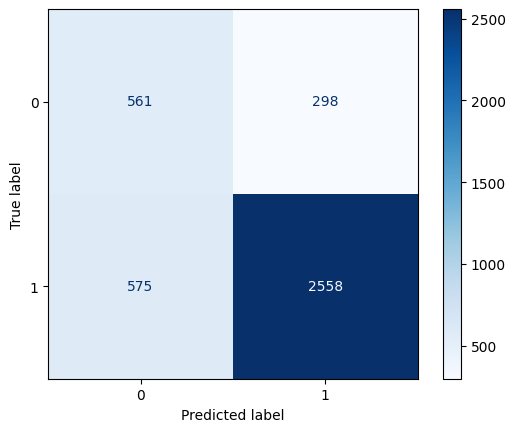

In [14]:
# Alternatively, we can visualize the confusion matrix using Scikit-
# Learn’s ConfusionMatrixDisplay class and Matplotlib’s pyplot
# module, which is designed for creating plots

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(nb_fit,
X_test_encoded, y_test, cmap = plt.cm.Blues);

In [15]:
# To compute the overall accuracy rate, we use Scikit-Learn’s accuracy_score function

from sklearn.metrics import accuracy_score
accuracy_score(y_test, testPredictions)

0.781312625250501

In [21]:
# To obtain the other common performance measures, we use
# Scikit-Learn’s classification_report function and specify the label
# for the target class to be “Poverty: 1” and the label for nontarget
# class to be “Poverty: 0”

from sklearn.metrics import classification_report
print(classification_report(y_test, testPredictions,
                            target_names=['Poverty: 0', 'Poverty: 1'], digits=4))

              precision    recall  f1-score   support

  Poverty: 0     0.4938    0.6531    0.5624       859
  Poverty: 1     0.8957    0.8165    0.8542      3133

    accuracy                         0.7813      3992
   macro avg     0.6947    0.7348    0.7083      3992
weighted avg     0.8092    0.7813    0.7914      3992



To evaluate the predictive performance of the naïve Bayes
model, we can compare its performance measures to those of
the naïve rule, where all cases are classified into the
predominant class

Because there are 3,133 target class
(Poverty: 1) cases and 859 nontarget class (Poverty: 0) cases
among the 3,992 test data cases, the naïve rule would classify
all cases into the target class and produce an accuracy rate of
3133 ÷ 3992 = 0.7848, sensitivity of 1, and specificity of 0

Although the overall accuracy of the naïve rule is about the
same as our model, the specificity of 0 is drastically lower than
that of our model (0.65)

In addition, the naïve rule classifies
all cases into Poverty: 1, so it does not help distinguish the
cases between the two classes. Our model, on the other hand, is
able to classify the cases into the two categories relatively
accurately

We can also use other cutoff values, instead of the default value
of 0.5 used in the Scikit-Learn package to compute the
performance measures

In [24]:
# use the following code to evaluate the predictive performance
# of the naïve Bayes model using the cutoff value of 0.75

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

testPredictionProbs = nb_fit.predict_proba(X_test_encoded)
testPredsCustomCutoff = np.where(testPredictionProbs[:, 1] > 0.75, 1, 0)

print(confusion_matrix(y_test, testPredsCustomCutoff))
print("Accuracy:", accuracy_score(y_test, testPredsCustomCutoff))
print(classification_report(y_test, testPredsCustomCutoff,
                            target_names=['Poverty: 0', 'Poverty: 1'], digits=4))

[[ 710  149]
 [ 920 2213]]
Accuracy: 0.7322144288577155
              precision    recall  f1-score   support

  Poverty: 0     0.4356    0.8265    0.5705       859
  Poverty: 1     0.9369    0.7064    0.8055      3133

    accuracy                         0.7322      3992
   macro avg     0.6863    0.7664    0.6880      3992
weighted avg     0.8290    0.7322    0.7549      3992



As expected, using a cutoff value
higher than the default 0.5 would improve specificity at the
expense of overall accuracy and sensitivity

However, if the goal of
the analysis is to identify those who are not in poverty, then a
higher cutoff value would be more effective

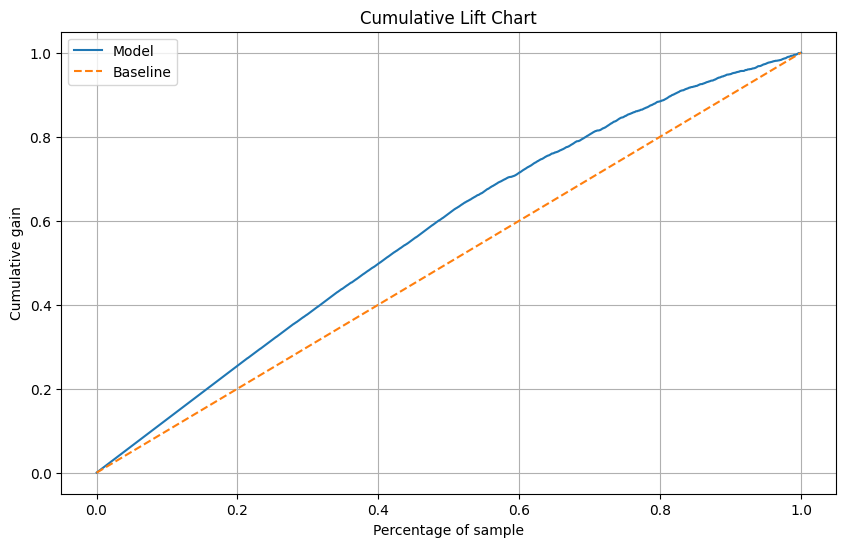

(Text(0.5, 1.0, 'Cumulative Lift Chart'),
 Text(0.5, 24.0, 'Percentage of sample'),
 Text(24.000000000000007, 0.5, 'Cumulative gain'),
 None,
 None)

In [30]:
# create a cumulative lift chart, we create a dataframe containing
# the actual class memberships (0 or 1) and the predicted
# probabilities for the target/positive class (1)

#it is important to convert the class membership values to integers for computational convenience later

import matplotlib.pyplot as plt
y_test = y_test.astype(int)

testOutcomes = pd.DataFrame({'Actuals': y_test, 'Probs': testPredictionProbs[:,1]})
data = testOutcomes.sort_values(by='Probs', ascending=False).reset_index(drop=True)
data['cumulative_positives'] = data['Actuals'].cumsum()
total_positives = data['Actuals'].sum()
data['cumulative_gain'] = data['cumulative_positives'] / total_positives
data['percentage_population'] = (np.arange(1, len(data) + 1) / len(data))

plt.figure(figsize=(10, 6))
plt.plot(data['percentage_population'], data['cumulative_gain'], label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
plt.title('Cumulative Lift Chart'), plt.xlabel('Percentage of sample'), plt.ylabel('Cumulative gain'), plt.legend(), plt.grid(), plt.show()

In [26]:
# To create the decile-wise lift chart, we first need to build a cumulative gains table

testOutcomes = pd.DataFrame({'Actuals':
y_test.astype('int'), 'Probs': testPredictionProbs[:, 1]})
cuts = pd.qcut(testOutcomes.Probs, q = 10, duplicates =
'drop')
lifts = (testOutcomes.groupby(cuts)['Actuals'].sum() /
cuts.value_counts()) / np.mean(testOutcomes.Actuals)
plotDat = pd.DataFrame({'Lift': np.round(lifts, 3), 'N':
cuts.value_counts()})
plotDat['Cumulative N'] = np.cumsum(np.flip(plotDat.N))
plotDat['Cumulative Percentile'] = round(plotDat['Cumulative N'] / len(testOutcomes) * 100, 0).astype('int')
plotDat

/tmp/ipython-input-1629435791.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifts = (testOutcomes.groupby(cuts)['Actuals'].sum() /


,Lift,N,Cumulative N,Cumulative Percentile
Probs,,,,
"(0.236, 0.279]",0.504,435,3992,100
"(0.279, 0.441]",0.667,365,3557,89
"(0.441, 0.533]",0.825,582,3192,80
"(0.533, 0.702]",0.936,230,2610,65
"(0.702, 0.922]",0.965,388,2380,60
"(0.922, 0.955]",1.190,438,1992,50
"(0.955, 0.98]",1.205,366,1554,39
"(0.98, 0.992]",1.237,406,1188,30
"(0.992, 0.998]",1.271,432,782,20


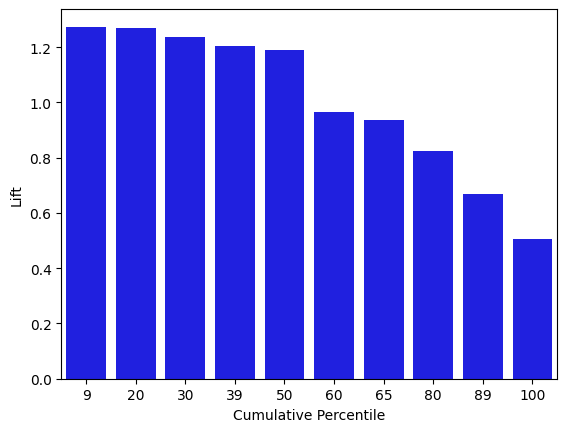

In [27]:
# create the decile wise lift chart to visualize the information
# from the cumulative gains table using Seaborn's barplot function

import seaborn as sns
sns.barplot(y = 'Lift', x = 'Cumulative Percentile', data = plotDat, color = 'blue');

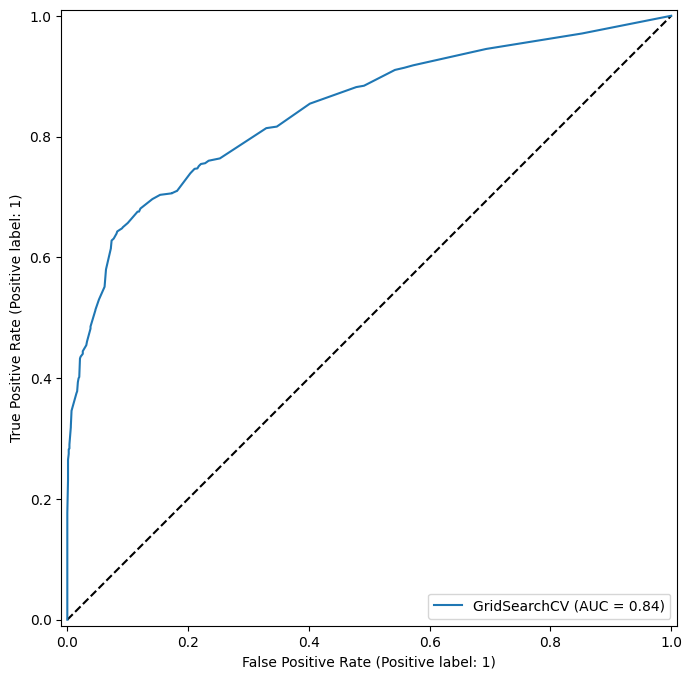

In [31]:
# Create a ROC curve for the naïve Bayes model, we use the same process described in the KNN example

from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c= 'k')
RocCurveDisplay.from_estimator(nb_fit, X = X_test_encoded, y = y_test, ax = ax);

The naïve Bayes model performs substantially better than the baseline model (shown as the dashed diagonal line) in terms of both sensitivity and specificity across all cutoff values

The area under the ROC curve, or AUC, is high (0.84), indicating that the naïve Bayes model performs well in predicting whether an individual is in poverty or not

In [32]:
# You can also use the Scikit-Learn's roc _aue_score function with the actual class memberships (_test) and the
# predicted probabilities of belonging to the target class (test PredictionProbs) to compute the AUC value

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, testPredictionProbs[:, 1])

np.float64(0.8430045625689504)

In [33]:
# Let's fit the model to the novel data in the Census_Score worksheet

myScoreData = pd.read_excel('/content/Census.xlsx', sheet_name = 'Census_Score')
myScoreData_encoded = dataEncoder. transform(myScoreData)
nb_Scores = nb_fit.predict(myScoreData_encoded)

Once scoring is finished, the nb_Scores object will contain classification results (whether or not the individual lives in
poverty: yes = 1 and no = 0)

We then add these results to our existing myScoreData as a new column, nb_Score, and view the first and last few results using the head and tail functions

In [37]:
myScoreData['nb_Score'] = nb_Scores
myScoreData.head ()

,Married,Female,White,Age,Edu,nb_Score
0,N,Y,Y,5,N,1
1,N,Y,Y,5,N,1
2,N,Y,N,5,Y,1
3,N,Y,Y,5,N,1
4,N,Y,Y,3,Y,1


In [36]:
myScoreData.tail()

,Married,Female,White,Age,Edu,nb_Score
61,N,N,Y,4,N,1
62,Y,Y,Y,4,Y,1
63,Y,N,N,5,Y,0
64,Y,N,Y,3,Y,0
65,Y,N,Y,5,Y,0
